マススペクトルとPubChemデータを結合したDataFrameを読み込み、  
横軸m/zの数値のないスペクトル強度を0埋めする前処理をする。  
そして回帰を実行

In [122]:
import pandas as pd
import numpy as np

In [124]:
# データを読み込む
df=pd.read_pickle("ProcessedData/nist_ms_pcp.pkl")

In [11]:
np.isclose(df.x[0],14)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [53]:
df["yunits"]

0     RELATIVE INTENSITY
1     RELATIVE INTENSITY
2     RELATIVE INTENSITY
3     RELATIVE INTENSITY
4     RELATIVE INTENSITY
5     RELATIVE INTENSITY
6     RELATIVE INTENSITY
7     RELATIVE INTENSITY
8     RELATIVE INTENSITY
9     RELATIVE INTENSITY
10    RELATIVE INTENSITY
11    RELATIVE INTENSITY
12    RELATIVE INTENSITY
13    RELATIVE INTENSITY
14    RELATIVE INTENSITY
Name: yunits, dtype: object

In [125]:
# 化合物リスト、ここにスペクトル強度を0埋めしたデータが入る。
comp_int_list=[]
for j,row in df.iterrows():
    # 1つの化合物について、m/z=1-140のスペクトル強度のリスト
    intensity_list=[]
    for i in range(1,140):
        close_ind=np.isclose(row["x"],i)
        # もしそのm/zがあれば
        if np.any(close_ind):
            y_value=row["y"][close_ind][0]
        # もしそのm/zがなければ
        else:
            y_value=0
        intensity_list.append(y_value)
    comp_int_list.append(intensity_list.copy())

In [126]:
# スペクトル強度を0埋めしたデータをデータフレームに
intens_interp=pd.DataFrame(comp_int_list,columns=np.arange(1,140))
# 連結する
ms_pcp_interp=pd.concat([df,intens_interp],axis=1)

In [102]:
df.to_csv("ProcessedData/nist_ms_pcp.csv")

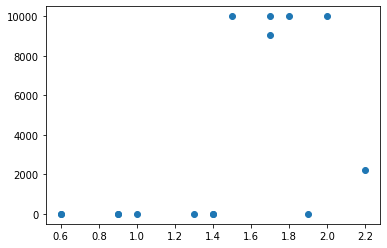

In [123]:
import matplotlib.pyplot as plt

plt.plot(ms_pcp_interp["xlogp"],ms_pcp_interp[69],'o')

線形回帰  
$$
y=w_0+w_1x
$$

で$x$の分散$S_{xx}$、共分散$S_{xy}$で
$$
w_1=\frac{S_{xy}}{S_{xx}}\\
w_0=\overline{y}-w_1\overline{x}
$$


In [144]:
# 試しにm/z=69について線形回帰してみる。
s_xy=np.cov(ms_pcp_interp[["xlogp",69]].T)
w_1=s_xy[0,1]/s_xy[0,0]
w_0=np.mean(ms_pcp_interp[69])-w_1*np.mean(ms_pcp_interp["xlogp"])
x_line=np.array([0,2.5])
y_line=x_line*w_1+w_0

print('coefficient = ', w_1) # 説明変数の係数を出力
print('intercept = ', w_0) # 切片を出力

coefficient =  5306.130728775357
intercept =  -3974.942148760331


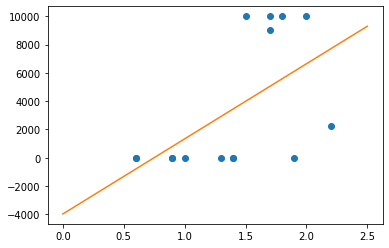

In [121]:
plt.plot(ms_pcp_interp["xlogp"],ms_pcp_interp[69],'o')
plt.plot(x_line,y_line)

In [128]:
# scikit-learnを使って線形回帰
from sklearn.linear_model import LinearRegression

In [142]:
lr=LinearRegression()

x_data=ms_pcp_interp[["xlogp"]].values
y_data=ms_pcp_interp[69].values

lr.fit(x_data,y_data)

LinearRegression()

In [143]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  9.10210898118
intercept =  -34.6706207764

coefficient =  5306.130728775356
intercept =  -3974.942148760329


In [231]:
# 1-140のm/zについてそれぞれ予測機を作成し、回帰を計算
lr_dict={}
for i in range(1,140):
    lr_dict[i]=LinearRegression()
    
    x_data=ms_pcp_interp[["xlogp"]].values
    y_data=ms_pcp_interp[i].values

    lr_dict[i].fit(x_data,y_data)

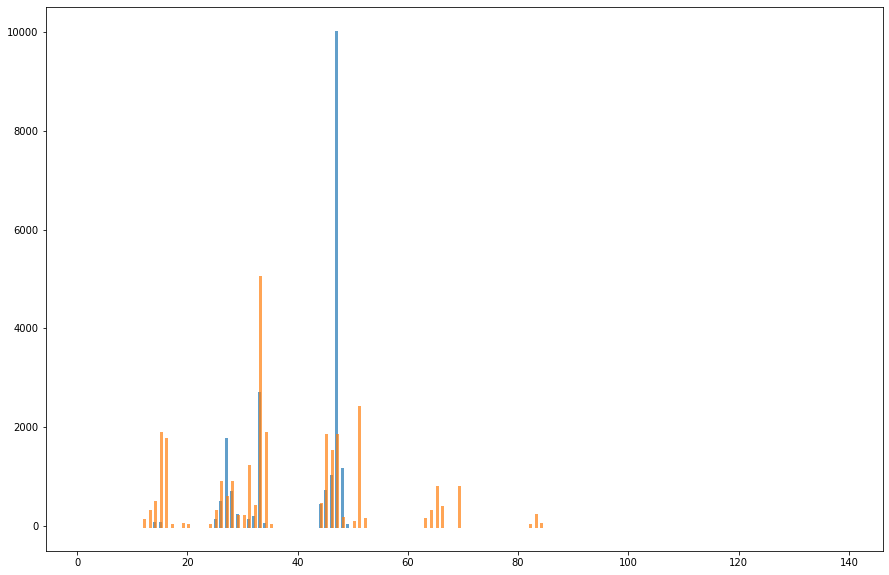

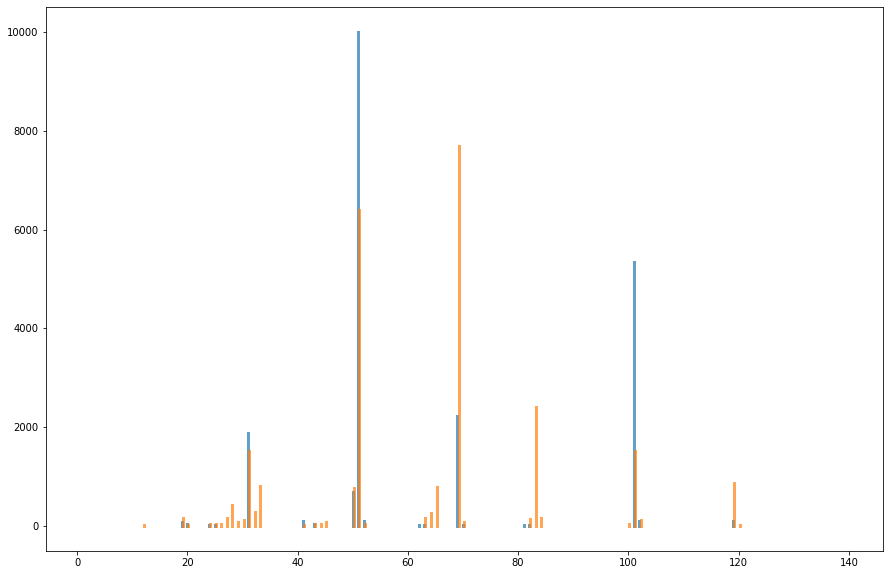

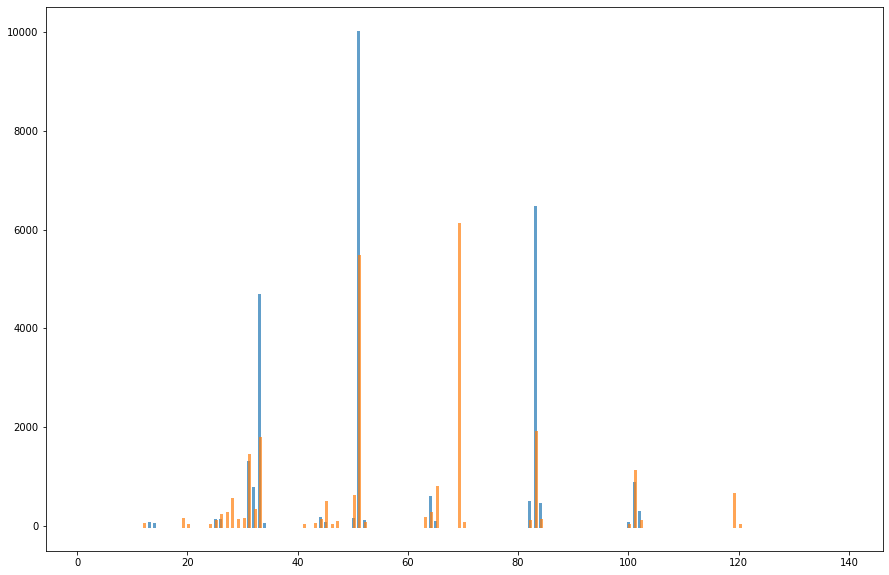

In [230]:
# 最初の3つの化合物について真のデータと予測データを図示

# 予測データを一つ一つ作るのではなく、一活で作ったほうが早い。
for i in range(0,3):
    plt.figure(figsize=(15,10))
    m_z=ms_pcp_interp.iloc[i,:]["x"]
    intens=ms_pcp_interp.iloc[i,:]["y"]
    xlogp=ms_pcp_interp.iloc[i,:]["xlogp"]
    spectrum_num=len(m_z)
    # 真のデータを図示
    for j in range(spectrum_num):
        plt.plot([m_z[j],m_z[j]],[0,intens[j]],color='C0',alpha=0.7, lw=3)
    # 予測データを図示
    for k in range(1,140):
        est_intens=lr_dict[k].predict([[xlogp]])[0]
        if est_intens<0:
            est_intens=0
        plt.plot([k+0.2,k+0.2],[0,est_intens],color='C1',alpha=0.7,lw=3)

In [74]:
lr=LinearRegression()

array([ 150.,   10.,  120.,   30., 1832.,   20.,   40., 1011.,   10.,
         10., 9999.,  110.,   10.,   60.,   10., 4134.,   90.,   20.])

In [145]:
for i,row in df.iterrows():
    print(i,row["x"][-1])

0 49.0
1 120.0
2 102.0
3 85.0
4 84.0
5 35.0
6 67.0
7 17.0
8 31.0
9 53.0
10 67.0
11 70.0
12 88.0
13 138.0
14 103.0


In [31]:
close_ind=np.isclose(df["x"][0],14)
df["x"][0][close_ind][0]

14.0

In [16]:
test_a=np.array([0,1,2,3])
test_b=np.array([True,False,False,False])
test_a[test_b]

array([0])

In [26]:
np.isclose(df.x[0],14)
np.where(np.isclose(df.x[0],14))

(array([0]),)